## Introduction
This tutorial will help introduce a couple data science concepts. We will first curate data, then we shall visualize said data and evenutally use it to make predictions. Curation consists of taking out data that we will not be taking advantage of blah blah blah

## Dataset curation
blah blah insert text aout setting shit up

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# we need to tidy our data frame
Some of that data is represented by integers. For example sex where 0 is Female and 1 is male.
CP which stands for Chest Pain can have four values 
( 0 = asymptomatic, 1 =  atypical angina, 2 = non-anginal pain, 3 = typical angina)
Target represents whether the patient has heart disease with 0 =  Disease and 1 = No Disease

## Data Visualization

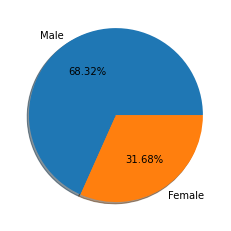

In [10]:
# Comparing males females
female = len(df[df.sex == 0])
male = len(df[df.sex == 1])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'],shadow=True,autopct='%1.2f%%')
plt.show()

From here the data shows most of the people treated were male. Lets see how much of each gender actually have heart disease

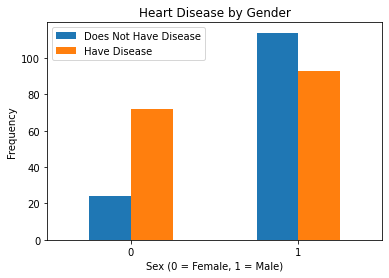

In [13]:
pd.crosstab(df.sex,df.target).plot(kind="bar") #,color=['#1CA53B','#AA1111' ]
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Does Not Have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

From here it appears that even though women tend to not be admitted for heart diease as much, more of them tend to have it.

CP 